In [111]:
import os
from datetime import datetime
import dateutil.parser
import matplotlib.pyplot as plt

In [122]:
class Results():
    def __init__(self,root):
        self.root = root
        
        self.nsamples = int(self.root.split("_")[-1])
        
        try:
            self.runtimes = self.parse_log()
        except:
            print("run {} returned error when reading runtimes...".format(self.root))
            self.runtimes = None
            
        try:
            self.accuracy, self.earliness, self.completeness= self.parse_simpleresults()
        except:
            print("run {} returned error when reading results...".format(self.root))
            self.accuracy, self.earliness, self.completeness = None, None, None
            pass
        
    def parse_log(self):

        with open(os.path.join(self.root,"run.log"),'r') as f:
            runlog = f.readlines()

        results=dict()
        for line, key in zip(runlog,["TrainProbabilities", "TestProbabilities", "Optimization", "Prediction"]):
            datestr = line[:31]
            date = dateutil.parser.parse(datestr)
            results[key]=date
        
        return results
    
    def parse_simpleresults(self):
        with open(os.path.join(self.root,"FinalResults/Others/NoReg/simpleresults-4-3-1-0.8-1.txt"),'r') as f:
            results = f.readlines()

        accuracy = float(results[1].replace("\n","").split(" ")[-1])
        earliness = float(results[2].replace("\n","").split(" ")[-1])
        completeness = float(results[3].replace("\n","").split(" ")[-1])
        
        return accuracy, earliness, completeness
    
    def get_total_runtime(self):
        return (self.runtimes["Prediction"] - self.runtimes["TrainProbabilities"]).total_seconds()
    
    def __str__(self):
        print("################################################################")
        print("Run "+self.root)
        print()
        if self.runtimes is not None:
            print("Runtime: {} s".format(self.get_total_runtime()))
        if self.accuracy is not None:
            print()
            print()
            print("Accuracy {}".format(self.accuracy))
            print("Earliness {}".format(self.earliness))
            print("Completeness {}".format(self.completeness))
        return ""
    
    def __dict__(self):
        return dict(
            nsamples=self.nsamples,
            runtime=self.get_total_runtime(),
            accuracy=self.accuracy,
            earliness=self.earliness)

In [120]:
runs = ["Results_50","Results_100","Results_250","Results_500","Results_750"]

In [125]:
for run in runs:
    print(Results(run))

################################################################
Run Results_50

Runtime: 1081.0 s


Accuracy 68.75
Earliness 5.0
Completeness 100.0

################################################################
Run Results_100

Runtime: 1705.0 s


Accuracy 47.8260869565217
Earliness 6.08695652173913
Completeness 100.0

################################################################
Run Results_250

Runtime: 4648.0 s


Accuracy 54.8387096774194
Earliness 5.56451612903226
Completeness 100.0

################################################################
Run Results_500

Runtime: 10520.0 s


Accuracy 59.2592592592593
Earliness 5.11111111111111
Completeness 100.0

################################################################
Run Results_750

Runtime: 18348.0 s


Accuracy 57.0707070707071
Earliness 5.0
Completeness 100.0



In [128]:
stats = list()
for run in runs:
    result = Results(run)
    stats.append(result.__dict__())



Text(0.5, 0, 'samples in the dataset')

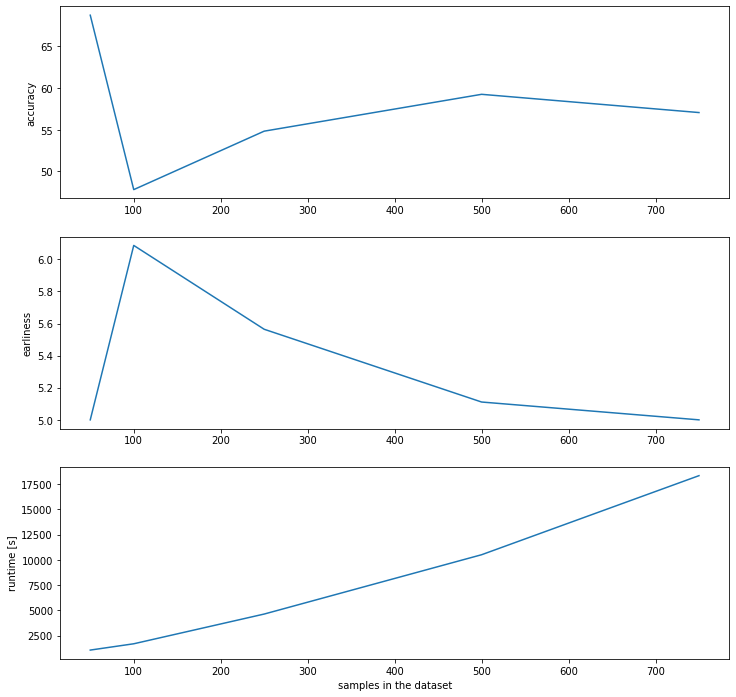

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(stats)

fig, ax = plt.subplots(3,1, figsize=(12,12))
ax[0].plot(df["nsamples"],df["accuracy"])
ax[0].set_ylabel("accuracy")
ax[1].plot(df["nsamples"],df["earliness"])
ax[1].set_ylabel("earliness")
ax[2].plot(df["nsamples"],df["runtime"])
ax[2].set_ylabel("runtime [s]")
ax[2].set_xlabel("samples in the dataset")